<a href="https://colab.research.google.com/github/COLLS003/Musica/blob/main/Music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and dependacies


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

%matplotlib inline


# Read data

In [78]:
# soul_df = pd.read_csv("soul.csv")
# ska_df = pd.read_csv("ska.csv")
# movie_df = pd.read_csv("movie.csv")
# hip_hope_df = pd.read_csv("hip-hop.csv")
# folk_df = pd.read_csv("folk.csv")
# electronic_df = pd.read_csv("electronic.csv")
# comedy_df = pd.read_csv("comedy.csv")
# blues_df = pd.read_csv("blues.csv")
# alternative_df = pd.read_csv("alternative.csv")
# child_df = pd.read_csv("child.csv")
# list the genres
genres = ['alternative.csv', 'blues.csv', 'child.csv', 'comedy.csv', 'electronic.csv','folk.csv', 'hip-hop.csv', 'movie.csv', 'ska.csv', 'soul.csv']
dfs    = [pd.read_csv(genre) for genre in genres]
data = pd.concat(dfs, ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  int64  
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   track_id          50000 non-null  object 
 4   popularity        50000 non-null  int64  
 5   acousticness      50000 non-null  float64
 6   danceability      50000 non-null  float64
 7   duration_ms       50000 non-null  int64  
 8   energy            50000 non-null  float64
 9   instrumentalness  50000 non-null  float64
 10  key               50000 non-null  object 
 11  liveness          50000 non-null  float64
 12  loudness          50000 non-null  float64
 13  mode              50000 non-null  object 
 14  speechiness       50000 non-null  float64
 15  tempo             50000 non-null  object 
 16  time_signature    50000 non-null  object

# Data preprocessing
**Drop unnecessary columns**

In [79]:
# Drop specified columns without inplace=True
data = data.drop(['instance_id', 'artist_name', 'track_name', 'track_id', 'time_signature'], axis=1)

# Check the info of the DataFrame to verify columns are dropped
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        50000 non-null  int64  
 1   acousticness      50000 non-null  float64
 2   danceability      50000 non-null  float64
 3   duration_ms       50000 non-null  int64  
 4   energy            50000 non-null  float64
 5   instrumentalness  50000 non-null  float64
 6   key               50000 non-null  object 
 7   liveness          50000 non-null  float64
 8   loudness          50000 non-null  float64
 9   mode              50000 non-null  object 
 10  speechiness       50000 non-null  float64
 11  tempo             50000 non-null  object 
 12  valence           50000 non-null  float64
 13  genre             50000 non-null  object 
dtypes: float64(8), int64(2), object(4)
memory usage: 5.3+ MB


In [ ]:
data.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'genre'],
      dtype='object')


# Handle missing values

In [80]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Impute missing values with the most frequent category
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Check information about the dataset
data_imputed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   popularity        50000 non-null  object
 1   acousticness      50000 non-null  object
 2   danceability      50000 non-null  object
 3   duration_ms       50000 non-null  object
 4   energy            50000 non-null  object
 5   instrumentalness  50000 non-null  object
 6   key               50000 non-null  object
 7   liveness          50000 non-null  object
 8   loudness          50000 non-null  object
 9   mode              50000 non-null  object
 10  speechiness       50000 non-null  object
 11  tempo             50000 non-null  object
 12  valence           50000 non-null  object
 13  genre             50000 non-null  object
dtypes: object(14)
memory usage: 5.3+ MB


# Encode categorical variables like 'key' and 'mode'

In [81]:
data = pd.get_dummies(data, columns=['key', 'mode'])
data.head()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,43,0.225000,0.845,238680,0.746,0.000088,0.0785,-5.655,0.0383,129.97,...,0,0,0,0,1,0,0,0,0,1
1,47,0.665000,0.862,166154,0.342,0.000082,0.1020,-10.095,0.0551,129.992,...,0,0,0,0,0,0,0,0,0,1
2,48,0.238000,0.590,219400,0.517,0.000000,0.1820,-9.239,0.0312,80.883,...,0,0,0,0,0,0,0,0,1,0
3,60,0.000077,0.374,-1,0.971,0.000000,0.3220,-4.284,0.0697,97.625,...,0,0,0,0,0,0,0,0,0,1
4,58,0.002730,0.449,-1,0.971,0.000000,0.1410,-3.660,0.0476,144.031,...,0,0,0,0,0,0,0,0,1,0


In [82]:
features = data.drop('genre', axis=1)
labels   = data['genre']

# Feature Reduction
**To reduce overfiting and help optimise the computation time**

1.Checking relationships between variables or features



In [10]:
correlations = data.corr()
correlations.style.background_gradient()

<ipython-input-10-375dd89a7666>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
popularity,1.000000,-0.372796,0.128683,0.055100,0.150871,-0.068177,-0.243377,0.319603,-0.254632,-0.091996,-0.007649,-0.019675,0.035001,-0.016731,0.045315,-0.020824,-0.027950,0.005923,-0.027597,0.023842,-0.022472,0.032451,-0.106927,0.106927
acousticness,-0.372796,1.000000,-0.105855,-0.038334,-0.601454,0.003627,0.249236,-0.612320,0.375212,-0.150105,-0.017873,0.034394,-0.047406,0.010624,-0.039556,-0.011775,0.076589,-0.003052,0.045985,0.007513,-0.010363,-0.008853,0.085910,-0.085910
danceability,0.128683,-0.105855,1.000000,-0.036814,-0.030583,-0.071595,-0.120213,0.080699,0.051984,0.365973,-0.022829,0.033969,0.016832,-0.018378,0.061527,-0.030801,-0.025794,-0.028718,-0.006117,0.009271,-0.014782,0.027517,-0.067976,0.067976
duration_ms,0.055100,-0.038334,-0.036814,1.000000,0.021658,0.057377,0.021080,0.007553,0.021675,-0.079157,0.008017,-0.004540,-0.002447,-0.007491,0.006598,0.001090,-0.011251,-0.000079,-0.002865,0.012468,0.001289,-0.005444,-0.023002,0.023002
energy,0.150871,-0.601454,-0.030583,0.021658,1.000000,-0.082568,0.188412,0.743329,0.100811,0.202685,0.014984,-0.020908,0.029519,-0.046465,0.054265,0.021079,-0.049384,0.012089,-0.044153,0.031169,-0.018354,0.002402,-0.057802,0.057802
instrumentalness,-0.068177,0.003627,-0.071595,0.057377,-0.082568,1.000000,-0.110810,-0.166041,-0.168358,-0.130290,-0.011492,0.007404,-0.002324,0.002607,-0.010267,-0.007770,-0.003198,0.005646,0.013609,-0.014119,0.024178,-0.008141,-0.033479,0.033479
liveness,-0.243377,0.249236,-0.120213,0.021080,0.188412,-0.110810,1.000000,-0.088891,0.638230,-0.066283,-0.014772,0.012266,-0.001896,-0.044245,0.033880,0.000895,0.004657,0.013357,-0.001942,0.055363,-0.025979,-0.015643,0.019296,-0.019296
loudness,0.319603,-0.612320,0.080699,0.007553,0.743329,-0.166041,-0.088891,1.000000,-0.202082,0.163501,0.010746,-0.027900,0.024406,-0.011890,0.042833,0.005932,-0.041770,0.002364,-0.036903,0.008523,-0.010399,0.017417,-0.057398,0.057398
speechiness,-0.254632,0.375212,0.051984,0.021675,0.100811,-0.168358,0.638230,-0.202082,1.000000,-0.089608,-0.031106,0.043193,-0.004128,-0.072899,0.091361,-0.021711,0.017668,-0.007812,-0.007461,0.084975,-0.064679,0.010207,-0.011699,0.011699
valence,-0.091996,-0.150105,0.365973,-0.079157,0.202685,-0.130290,-0.066283,0.163501,-0.089608,1.000000,0.019519,0.008633,0.004147,0.011520,-0.036774,-0.000065,-0.011478,-0.014367,0.007115,-0.023156,0.025202,-0.000166,0.039624,-0.039624


# Split data into features and target

In [83]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



In [85]:
import pandas as pd

# # Find rows with missing values
# rows_with_missing_values = df[df.isnull().any(axis=1)]

# # Print the first few rows with missing values
# print(rows_with_missing_values.head())
# # Impute missing values with the mean of the column
# df_filled = df.fillna(df.mean())
# # df = pd.DataFrame(scaled_features)
# # df.isnull().sum().sum() that generated the values
df = pd.DataFrame(scaled_features)
print("b4 imputer: ", df.isnull().sum().sum())
# Impute missing values with the mean of the column
df_filled = df.fillna(df.mean())
print("After imputer: ", df_filled.isnull().sum().sum())
scaled_features = scaler.fit_transform(df_filled)



b4 imputer:  7461
After imputer:  0


In [86]:
pca = PCA()
pca.fit(scaled_features)
exp_variance = pca.explained_variance_ratio_
num_components = pca.n_components_

Text(0.5, 0, 'Principal Component #')

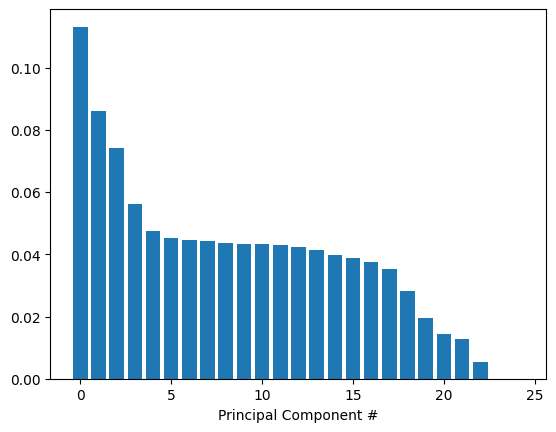

In [87]:
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(num_components), exp_variance)
ax.set_xlabel('Principal Component #')

we do have a  clear elbow in this scree plot, meaning  it is definitly straightforward to find the number of intrinsic dimensions using this method.However lets explore it furthure


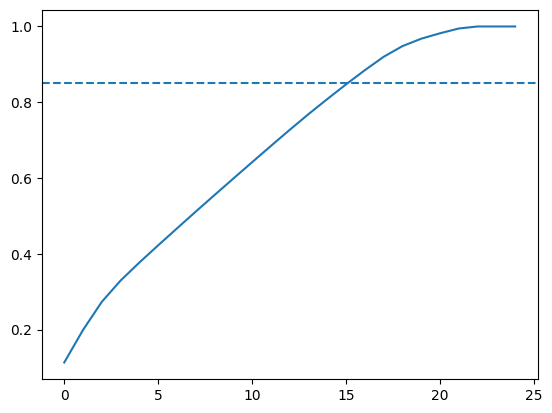

In [88]:
cum_exp_variance = np.cumsum(exp_variance)

fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

In [89]:
n_components = 18 #from the graph about 20 features explain the 85% of the variace
#finally perform PCA
pca = PCA(n_components, random_state=10)
pca.fit(scaled_features)
pca_projection = pca.transform(scaled_features)
pca_projection.shape

(50000, 18)

#Model Training

In [90]:
#split data into test and train data
X_train, X_test, y_train, y_test = train_test_split(pca_projection,labels,  random_state=100, stratify=labels)
# try to get the shape of the data
X_train.shape

(37500, 18)

Train a Random forest Model

Train a Logistic regresion  Model

In [49]:
model_lg = LogisticRegression(random_state=90)
model_lg.fit(X_train,y_train)
predictions_lg = model_lg.predict(X_test)
print("Logistic Regression:", model_lg.score(X_test,y_test))



Logistic Regression: 0.5456511518570757


In [91]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel="rbf", C=5, gamma=0.01)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
# predictions = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = svm_classifier.score(X_test, y_test)
print("Support Vector Machine Accuracy:", accuracy)


Support Vector Machine Accuracy: 0.5308


In [ ]:


# Support Vector Machine Accuracy: 0.602350728725905
# Support Vector Machine Accuracy: 0.603761165961448
# Support Vector Machine Accuracy: 0.6049835448989187


#Submission modeling


In [65]:
test_df = pd.read_csv("test.csv")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30931 entries, 0 to 30930
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       30931 non-null  int64  
 1   artist_name       30931 non-null  object 
 2   track_name        30931 non-null  object 
 3   track_id          30931 non-null  object 
 4   popularity        30931 non-null  int64  
 5   acousticness      30931 non-null  float64
 6   danceability      30931 non-null  float64
 7   duration_ms       30931 non-null  int64  
 8   energy            30931 non-null  float64
 9   instrumentalness  30931 non-null  float64
 10  key               30931 non-null  object 
 11  liveness          30931 non-null  float64
 12  loudness          30931 non-null  float64
 13  mode              30931 non-null  object 
 14  speechiness       30931 non-null  float64
 15  tempo             30931 non-null  object 
 16  time_signature    30931 non-null  object

#data processing II

In [48]:
# Drop specified columns without inplace=True
test_data = test_df.drop(['instance_id', 'artist_name', 'track_name', 'track_id', 'time_signature'], axis=1)

# Check the info of the DataFrame to verify columns are dropped
test_data.shape

(30931, 13)

#Handle missing valuesII

In [49]:
# Replace '?' with NaN
test_data.replace('?', np.nan, inplace=True)

# Impute missing values with the most frequent category
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)

# Check information about the dataset
data_imputed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30931 entries, 0 to 30930
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   popularity        30931 non-null  object
 1   acousticness      30931 non-null  object
 2   danceability      30931 non-null  object
 3   duration_ms       30931 non-null  object
 4   energy            30931 non-null  object
 5   instrumentalness  30931 non-null  object
 6   key               30931 non-null  object
 7   liveness          30931 non-null  object
 8   loudness          30931 non-null  object
 9   mode              30931 non-null  object
 10  speechiness       30931 non-null  object
 11  tempo             30931 non-null  object
 12  valence           30931 non-null  object
dtypes: object(13)
memory usage: 3.1+ MB


#encode categorical II

In [51]:
test_data = pd.get_dummies(test_data, columns=['key', 'mode'])
test_data.head()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,41,0.255000,0.699,218733,0.949,0.256000,0.0983,-4.110,0.3890,146.064,...,0,0,0,0,0,1,0,0,0,1
1,38,0.364000,0.649,159067,0.296,0.000008,0.1320,-9.389,0.0334,81.911,...,0,0,0,0,0,0,0,1,1,0
2,55,0.445000,0.457,234802,0.425,0.000000,0.0714,-10.500,0.2430,201.472,...,0,0,0,1,0,0,0,0,0,1
3,7,0.332000,0.756,78760,0.543,0.000000,0.3330,-5.477,0.0279,88.98,...,0,0,0,0,0,0,0,1,1,0
4,54,0.000583,0.595,223427,0.894,0.000001,0.3260,-4.115,0.0323,101.987,...,0,0,0,0,0,0,0,0,1,0


#further cleaning

In [52]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(test_data)


In [54]:
import pandas as pd

# # Find rows with missing values
# rows_with_missing_values = df[df.isnull().any(axis=1)]

# # Print the first few rows with missing values
# print(rows_with_missing_values.head())
# # Impute missing values with the mean of the column
# df_filled = df.fillna(df.mean())
# # df = pd.DataFrame(scaled_features)
# # df.isnull().sum().sum() that generated the values
df = pd.DataFrame(scaled_features)
print("b4 imputer: ", df.isnull().sum().sum())
# Impute missing values with the mean of the column
df_filled = df.fillna(df.mean())
print("After imputer: ", df_filled.isnull().sum().sum())
scaled_features = scaler.fit_transform(df_filled)


b4 imputer:  0
After imputer:  0


ValueError: X has 25 features, but SVC is expecting 24 features as input.

In [61]:
pca = PCA()
pca.fit(scaled_features)
exp_variance = pca.explained_variance_ratio_
num_components = pca.n_components_

Text(0.5, 0, 'Principal Component #')

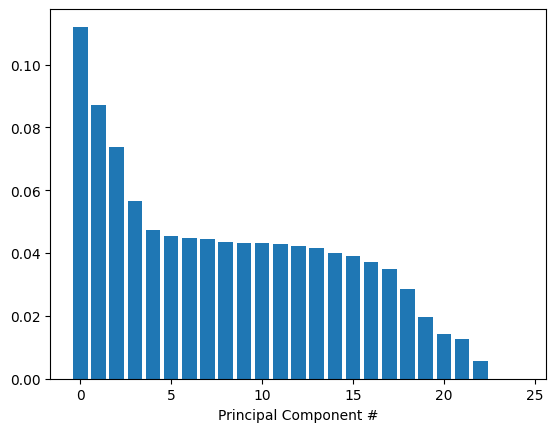

In [59]:
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(num_components), exp_variance)
ax.set_xlabel('Principal Component #')

In [62]:
n_components = 24 #from the graph about 20 features explain the 85% of the variace
#finally perform PCA
pca = PCA(n_components, random_state=10)
pca.fit(scaled_features)
pca_projection = pca.transform(scaled_features)
pca_projection.shape

(30931, 24)

In [63]:
predictions = svm_classifier.predict(pca_projection)

In [66]:
# Create a submission DataFrame
submission_df = pd.DataFrame({'instance_id': test_df['instance_id'], 'genre': predictions})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)